In [1]:
import ROOT as rt
from larcv import larcv
import numpy as np
import matplotlib.pyplot as plt
from array import array

Welcome to JupyROOT 6.14/02


In [2]:
# Specify location of dataset
# get the data at: http://www.stanford.edu/~kterao/public_data/v0.1.0/2d/classification/five_particles/practice_test_5k.root
dataset = "practice_test_5k.root"

In [3]:
# Open the ROT file and get a look of the ROOT Trees inside the file
f = rt.TFile(dataset) # open file
f.ls() # print contents
f.Close() # close file (since we dont intend to interact with file directly

TFile**		practice_test_5k.root	
 TFile*		practice_test_5k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


In [4]:
# create instance of IOManager that will interface with file
io = larcv.IOManager(larcv.IOManager.kREAD,"input",larcv.IOManager.kTickForward)
io.add_in_file( dataset )
io.initialize()

True

    [NORMAL]  <input::prepare_input> Opening a file in READ mode: practice_test_5k.root
    [NORMAL]  <input::initialize> Prepared input with 5000 entries...


Warning in <TStreamerInfo::Build>: larcv::EventParticle: base class larcv::ParticleSet has no streamer or dictionary it will not be saved


In [5]:
# Define a new ROOT File. We'll write to this one.
# We also set up the TFile to overwrite any file with the same name.
# To prevent re-writing, use the "new" option.
outfile = rt.TFile("out.root","recreate")


# Define a ROOT tree. We'll store different types of data into Branches.
# Data in the tree is stored as entries (sort of like Rows in a data table)
# with different values for the data type stored in the branches (sort of like Columns in a data table).
# The useful feature of ROOT trees is that they store complex data such as instances of classes.
tree = rt.TTree("example","Example output tree")

# Define the branches and assign variable to save

# branch to save numpy array storeing crop of image
# Using a class in the larcv library whose purpose is to store numpy arrays in ROOT trees
# see larcv/core/PyUtil/NumpyArray.h for more info on this class
data = larcv.NumpyArrayFloat()
tree.Branch("data",data)

# branch to save pdg code
pdgcode = array('i',[0]) # single integer
tree.Branch("pdg",pdgcode,"pdg/I")

# detector space vertex, stored as std::vector<float>
vtx = rt.std.vector("float")(3,0)
tree.Branch("vtx",vtx)

# Now, everytime we call TTree::Fill() (via tree.Fill()), 
# the values stored in these class instances -- data, pdgcode,and vtx --
# will be written to the ROOT File as an entry in the TTree.
# For how to access this data, see the last cell below.

<ROOT.TBranchElement object ("vtx") at 0x561b7c8c3d80>

In [6]:
# Get number of entries in the data file
NENTRIES = io.get_n_entries()

# Pick 10 random entries in the data file
entry_list = np.random.randint(0,NENTRIES-1,size=10)
print(entry_list)

[ 508 1327 3854 4556 1512 3327 2689 1898 1026 3070]


('shape: ', (256, 256))
ENTRY[508] PDG=11


/home/twongjirad/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  


('shape: ', (256, 256))
ENTRY[1327] PDG=22
('shape: ', (256, 256))
ENTRY[3854] PDG=211


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


('shape: ', (256, 256))
ENTRY[4556] PDG=2212
('shape: ', (256, 256))
ENTRY[1512] PDG=22
('shape: ', (256, 256))
ENTRY[3327] PDG=211
('shape: ', (256, 256))
ENTRY[2689] PDG=13
('shape: ', (256, 256))
ENTRY[1898] PDG=22
('shape: ', (256, 256))
ENTRY[1026] PDG=22
('shape: ', (256, 256))
ENTRY[3070] PDG=211


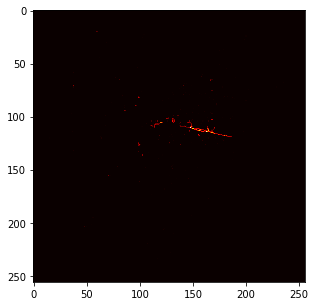

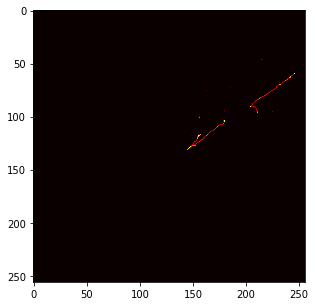

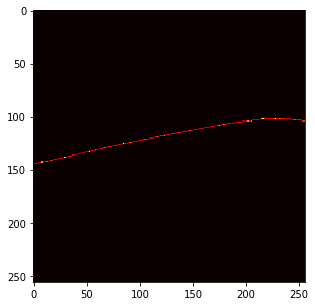

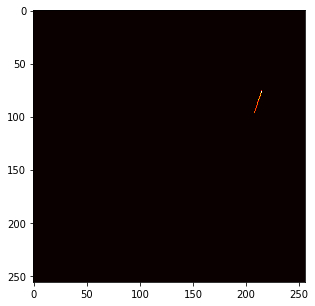

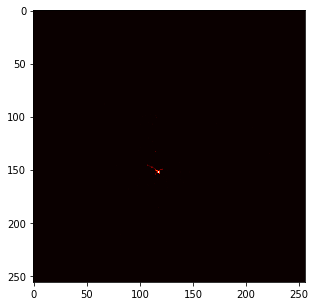

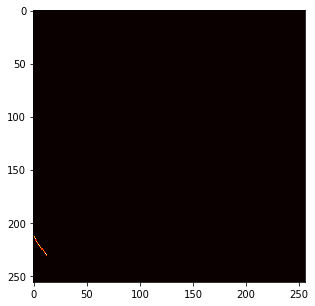

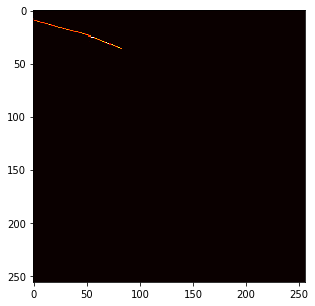

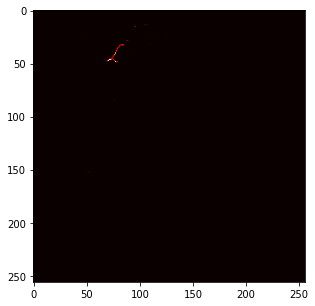

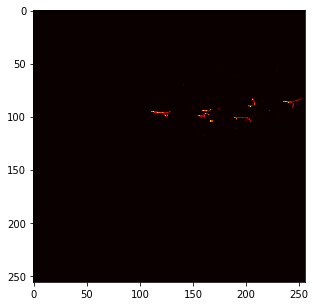

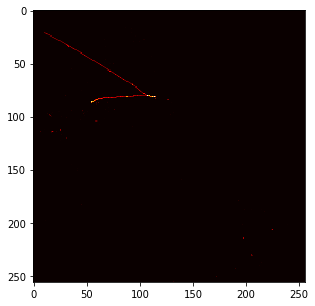

In [7]:
for n,entry in enumerate(entry_list.tolist()):
    
    # go to entry number
    io.read_entry(entry)
    
    # get the images and MC truth for the loaded entry
    ev_data = io.get_data(larcv.kProductImage2D,"data")
    ev_particle = io.get_data(larcv.kProductParticle, "mctruth")
    
    # Get the Y-plane image and convert into numpy array
    img = ev_data.at(2)
    np_img = larcv.as_ndarray(img)
    print("shape: ",np_img.shape)
    
    # we make a 50x50 crop inside the image
    np_crop = np_img[75:125,75:125]
    
    # store data of numpy array into NumpyArrayFloat class
    data.store(np_crop)
    
    # store pdg code
    pdgcode[0] = ev_particle.as_vector().at(0).pdg_code()
    
    # store (x,y,z) vertex
    vtx[0] = ev_particle.as_vector().at(0).x()
    vtx[1] = ev_particle.as_vector().at(0).y()
    vtx[2] = ev_particle.as_vector().at(0).z()
    
    print("ENTRY[%d] PDG=%d"%(entry,pdgcode[0]))
    
    # save entry in tree
    tree.Fill()
    
    # plot the image 
    fig, ax = plt.subplots(1,1,figsize=(5, 5))
    #img = imgbatch[ib,:].reshape(256,256)
    #imgout = padandcropandflip(img)
    #print("LABEL[%d]: "%(ib),labelname[np.argmax(lbl[ib])])
    ax.imshow(np_img, cmap='hot', interpolation='nearest')
    fig.show()

In [8]:
# Write Tree and close
# Note: if you want to fill and save the tree again, need to rerun cell that creates TFile
tree.Write()
outfile.Close()

ENTRY[0] pdg=11 vtx=(93.5,18.8,59.9)
ENTRY[1] pdg=22 vtx=(40.5,50.0,91.1)
ENTRY[2] pdg=211 vtx=(-0.2,103.6,72.7)
ENTRY[3] pdg=2212 vtx=(104.1,22.6,48.6)
ENTRY[4] pdg=22 vtx=(65.5,51.6,79.8)
ENTRY[5] pdg=211 vtx=(6.5,88.2,115.8)
ENTRY[6] pdg=13 vtx=(41.9,106.1,18.4)
ENTRY[7] pdg=22 vtx=(14.5,55.3,49.4)
ENTRY[8] pdg=22 vtx=(54.9,39.7,47.6)
ENTRY[9] pdg=211 vtx=(5.0,124.1,10.7)
TFile**		out.root	
 TFile*		out.root	
  KEY: TTree	example;1	Example output tree


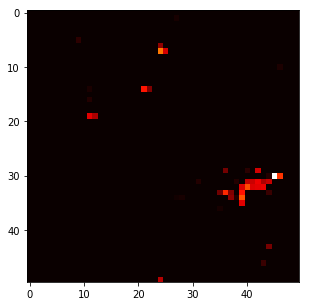

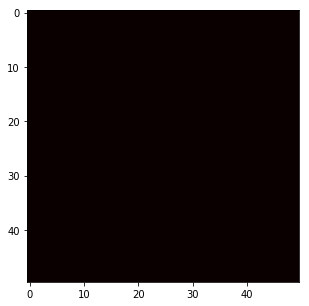

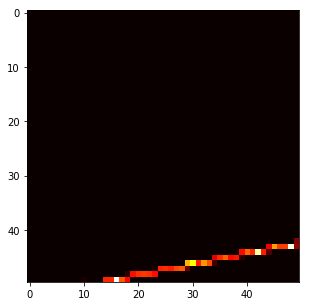

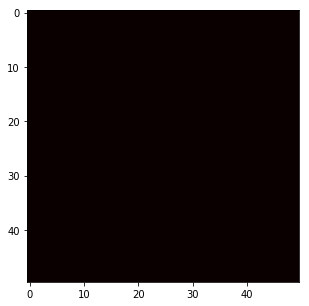

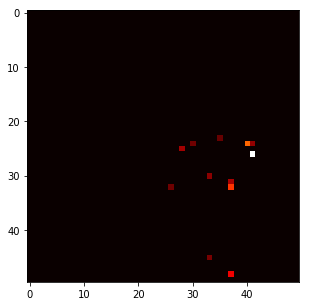

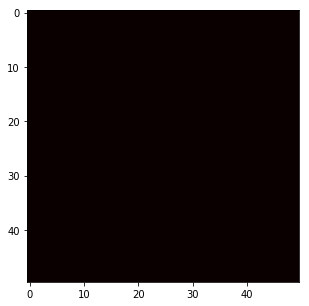

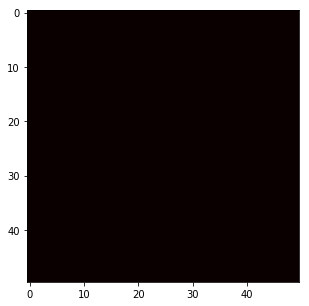

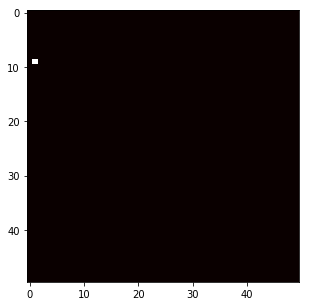

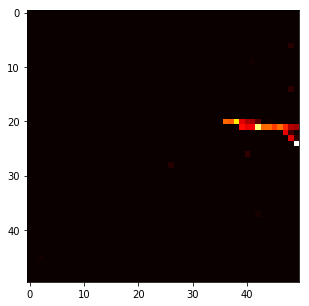

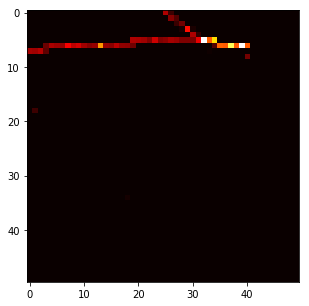

In [9]:
# OPEN THE FILE AND TREE AND DUMP IMAGES
infile = rt.TFile("out.root")
infile.ls()

# Get the TTree tree from the ROOT file
intree = infile.Get("example")

# Get the number of entries in the tree
nentries = intree.GetEntries()

# Loop over the entries
for i in range(nentries):
    # Load entry i of the TTree
    intree.GetEntry(i)
    
    # access the branch variables
    print("ENTRY[%d] pdg=%d vtx=(%.1f,%.1f,%.1f)"%(i,intree.pdg,intree.vtx[0],intree.vtx[1],intree.vtx[2]))
    
    # to get back the save numpy array, use the following function of NumpyArrayFloat
    arr = intree.data.tonumpy()
    
    # plot it
    fig, ax = plt.subplots(1,1,figsize=(5, 5))
    ax.imshow(arr, cmap='hot', interpolation='nearest')
    fig.show()
    